In [89]:
import datashader as ds, datashader.transfer_functions as tf, numpy as np
from datashader import spatial
from datashader.utils import lnglat_to_meters as webm
import pandas as pd

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

In [90]:
df = pd.read_csv('output.csv')
df.columns = ['easting','northing','count','norm_count']
print("Size: {:,}".format(len(df)))
df.head()

Size: 3,190


,easting,northing,count,norm_count
0,-8.264371e+06,4.989198e+06,375,438
1,-8.263149e+06,4.989198e+06,368,430
2,-8.261926e+06,4.989198e+06,512,598
3,-8.260703e+06,4.989198e+06,963,1125
4,-8.259480e+06,4.989198e+06,249,291


In [91]:
plot_width  = int(1200)
plot_height = int(800)
background = "black"


In [92]:
USA           = ((-124.72,  -66.95), (23.55, 50.06))
LakeMichigan  = (( -91.68,  -83.97), (40.75, 44.08))
Chicago       = (( -88.29,  -87.30), (41.57, 42.00))
Chinatown     = (( -87.67,  -87.63), (41.84, 41.86))
NewYorkCity   = (( -74.39,  -73.44), (40.51, 40.91))
LosAngeles    = ((-118.53, -117.81), (33.63, 33.96))
Houston       = (( -96.05,  -94.68), (29.45, 30.11))
Austin        = (( -97.91,  -97.52), (30.17, 30.37))
NewOrleans    = (( -90.37,  -89.89), (29.82, 30.05))
Atlanta       = (( -84.88,  -84.04), (33.45, 33.84))


In [93]:
export = partial(export_image, background = background, export_path="export")

In [96]:
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
agg = cvs.points(df, 'easting', 'northing', ds.max('norm_count'))

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


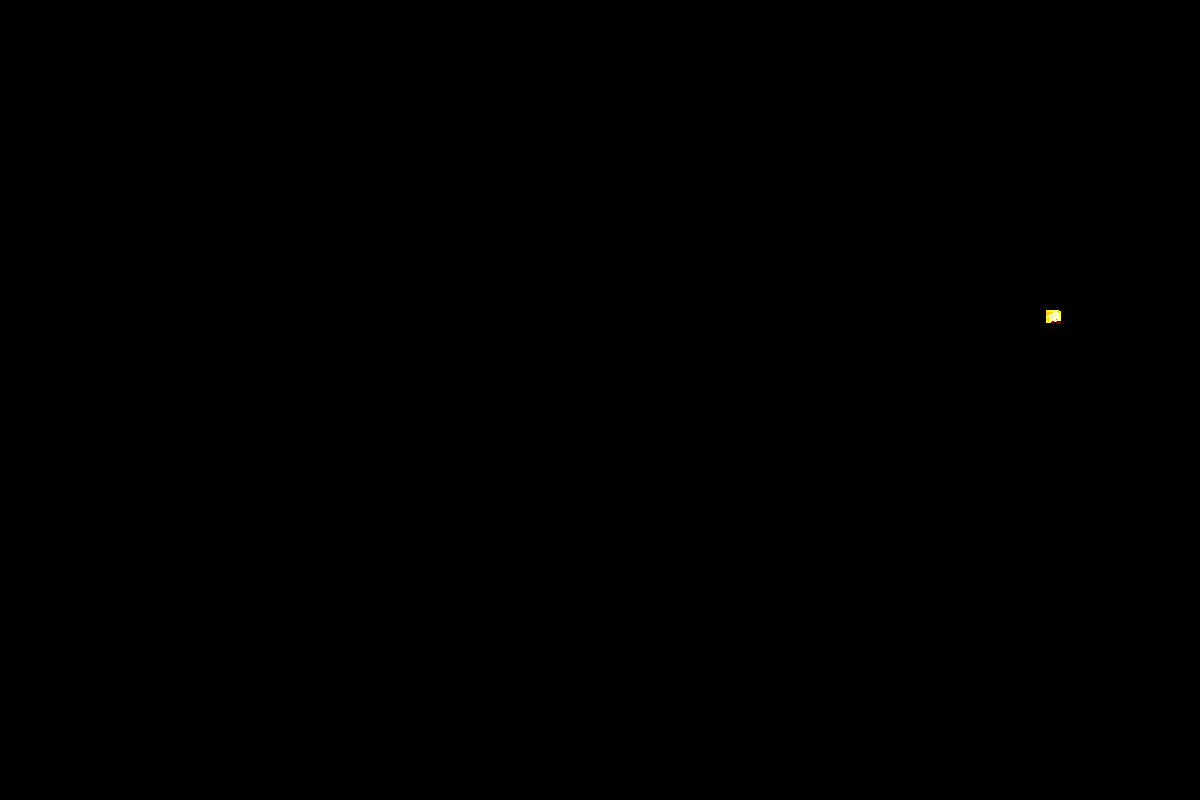

In [97]:
from matplotlib.cm import hot
export(tf.shade(agg, cmap = hot, how='log'),"USA")